In [1]:
import gensim
from gensim.models import KeyedVectors
import collections
from collections import OrderedDict
import os



In [2]:
path = '/home/ayan-yue/Documents/projects/dynamic-word-embeddings/diachronic-models-crisis-recession/'

In [3]:
query_terms = '-'.join(path.split('/')[-2].split('-')[2:])

In [4]:
dyn_vec = OrderedDict()
t = 16
startyear = 2003

for i in range(t):
    for file in os.listdir(path):
        filename = os.path.join(path, file)
        if os.path.basename(filename).split('.')[0] == str(startyear + i):
            dyn_vec[os.path.basename(filename).split('.')[0]] = KeyedVectors.load(filename)
    
    

In [5]:
dyn_vec

OrderedDict([('2003', <gensim.models.word2vec.Word2Vec at 0x7f2f3100eba8>),
             ('2004', <gensim.models.word2vec.Word2Vec at 0x7f2f30ab0eb8>),
             ('2005', <gensim.models.word2vec.Word2Vec at 0x7f2f3100ecc0>),
             ('2006', <gensim.models.word2vec.Word2Vec at 0x7f2f308f8e48>),
             ('2007', <gensim.models.word2vec.Word2Vec at 0x7f2f304a1390>),
             ('2008', <gensim.models.word2vec.Word2Vec at 0x7f2f308f8c50>),
             ('2009', <gensim.models.word2vec.Word2Vec at 0x7f2f3012eeb8>),
             ('2010', <gensim.models.word2vec.Word2Vec at 0x7f2f2fe9cba8>),
             ('2011', <gensim.models.word2vec.Word2Vec at 0x7f2f2f9cbf28>),
             ('2012', <gensim.models.word2vec.Word2Vec at 0x7f2f2f313e48>),
             ('2013', <gensim.models.word2vec.Word2Vec at 0x7f2f2f9cbf98>),
             ('2014', <gensim.models.word2vec.Word2Vec at 0x7f2f2eca4be0>),
             ('2018', <gensim.models.word2vec.Word2Vec at 0x7f2f2f313f60>)])

In [6]:
import pickle


with open('pickled-d-dcms-' + query_terms, 'rb') as fp:
    d = pickle.load(fp)


In [7]:
for key in d:
    d[key] = d[key].split(' ')
    

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx

def vocab_search(string):
    
    slices = []
    for key in d:
        for i in range(len(d[key])):
            if d[key][i] == string:
                slices.append(key)
                break
    
    return slices
            

In [9]:
vocab_search('recession')

['2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2018']

In [10]:
#list(G.adjacency()) to analyze graph

def graph(query, upper_cossim, lower_cossim, path):
    
    m = vocab_search(query)
    for i in range(len(m)):
        
        #construct graph
        G = nx.Graph()
        nodes = dyn_vec[m[i]].most_similar(query)
        for j in range(len(nodes)):
            cos_sim = dyn_vec[m[i]].similarity(query, nodes[j][0])
            G.add_edge(query, nodes[j][0], weight=cos_sim)
            for k in range(len(nodes)):
                cos_sim = dyn_vec[m[i]].similarity(nodes[j][0], nodes[k][0])
                G.add_edge(nodes[j][0], nodes[k][0], weight=cos_sim)
                G.remove_edges_from(G.selfloop_edges())
                
        #visualise
        fig = plt.figure()
        
        #figure size
        plt.rcParams['figure.figsize'] = [20, 15]
        
        elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= upper_cossim]
        emed = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < upper_cossim and d['weight'] > lower_cossim]
        esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= lower_cossim]
        query_node = [node for node in G.nodes() if node == query]
        other_nodes = [node for node in G.nodes() if node != query]

        pos = nx.spring_layout(G)
        
        #nodes
        nx.draw_networkx_nodes(G, pos, nodelist=query_node, cmap=plt.get_cmap('hsv'), node_color='r', node_size = 800)
        nx.draw_networkx_nodes(G, pos, nodelist=other_nodes, cmap=plt.get_cmap('hsv'), node_color='lavender', node_size = 800)
        
        #edges
        nx.draw_networkx_edges(G, pos, edgelist=elarge, width=8, edge_color='lime' )
        nx.draw_networkx_edges(G, pos, edgelist=emed, width=5, alpha=0.25, edge_color='lime' )
        nx.draw_networkx_edges(G, pos, edgelist=esmall, width=4, alpha=0.3, edge_color='lavender')
        
        #labels
        nx.draw_networkx_labels(G, pos, font_size=20)
        
        #titles
        plt.title(str(list(dyn_vec.keys())[i]) + '\n' + 'upper cosine similarity threshold: ' + str(upper_cossim) + '\n' + 'lower cosine similarity threshold: ' + str(lower_cossim), fontsize=25)
        
        #save
        if not os.path.exists(path):
            os.makedirs(path)
        
        fig.savefig(path + str(list(dyn_vec.keys())[i]) + '.png')
        
        
     
    

/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  # Remove the CWD from sys.path while we load stuff.
/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  if sys.path[0] == '':
/home/ayan-yue/Documents/projects/env1/local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  from ipykernel import kernelapp as app


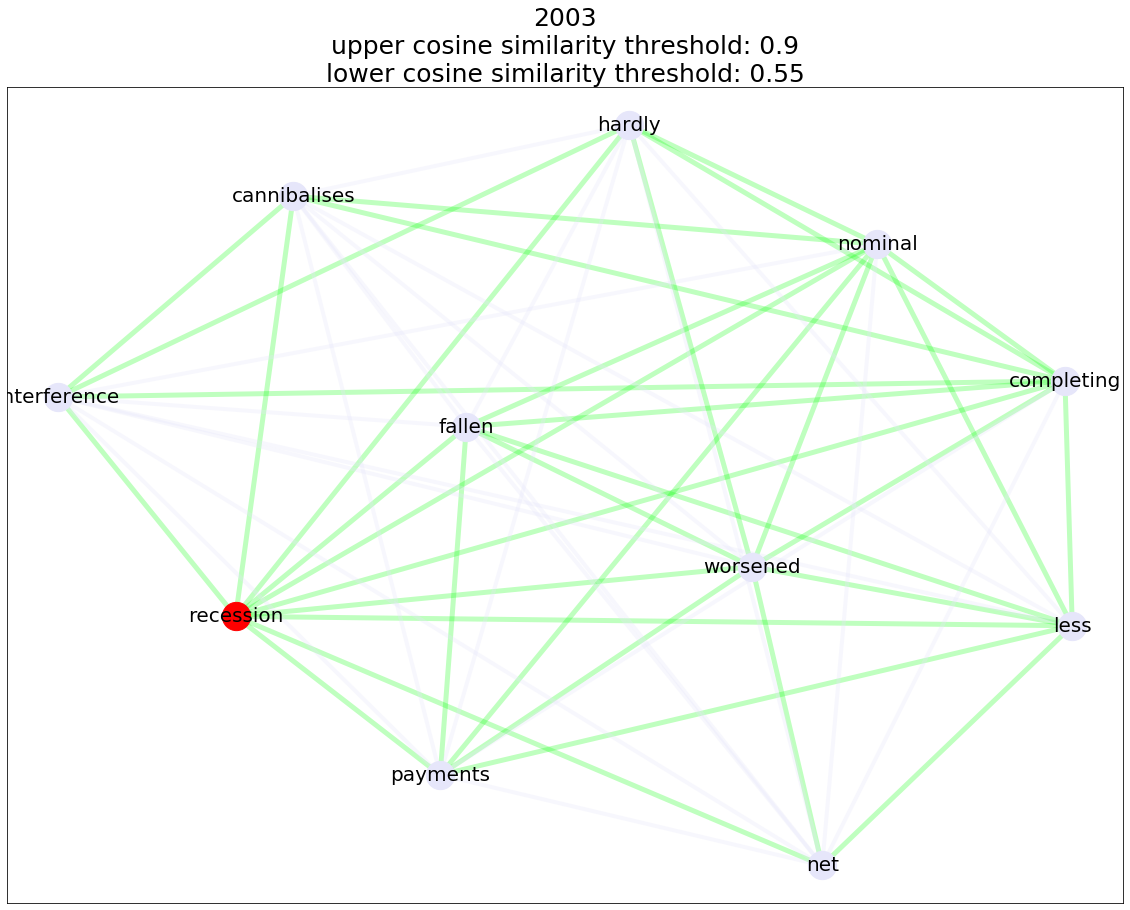

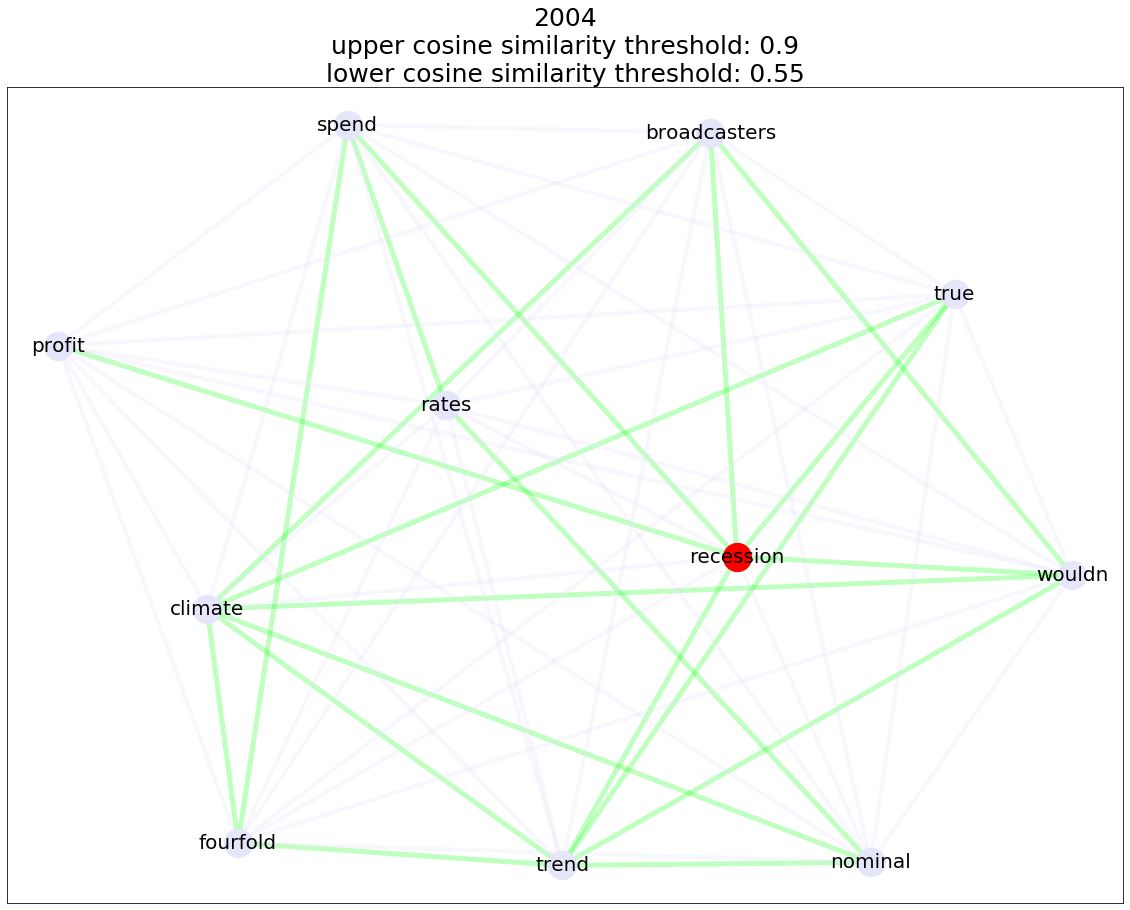

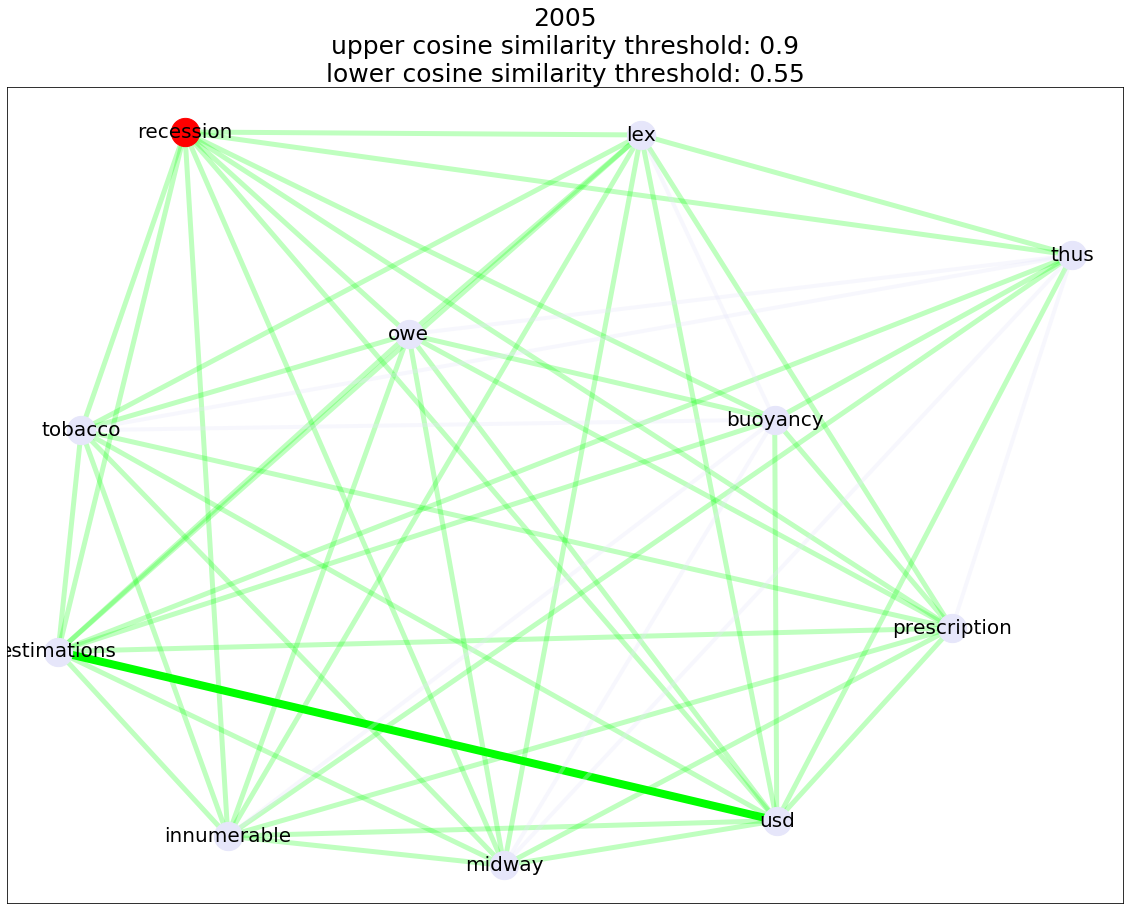

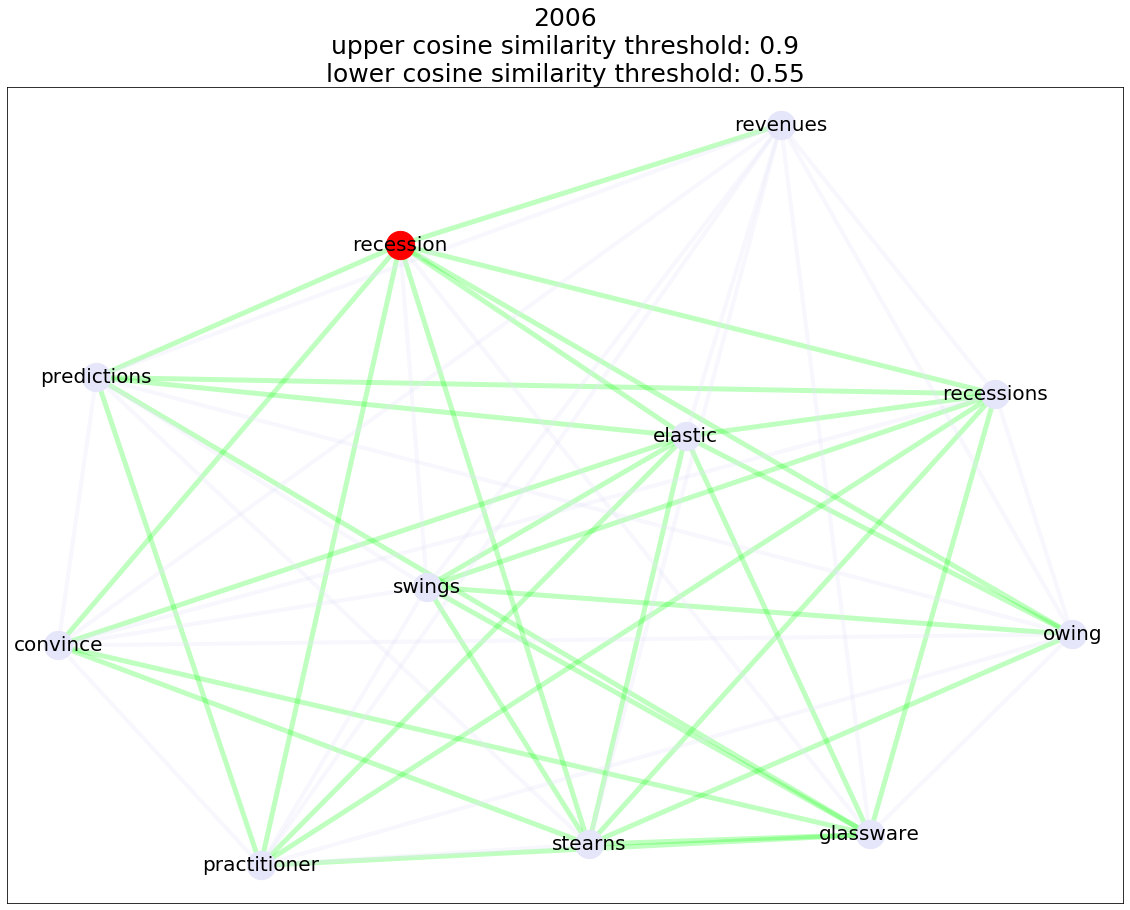

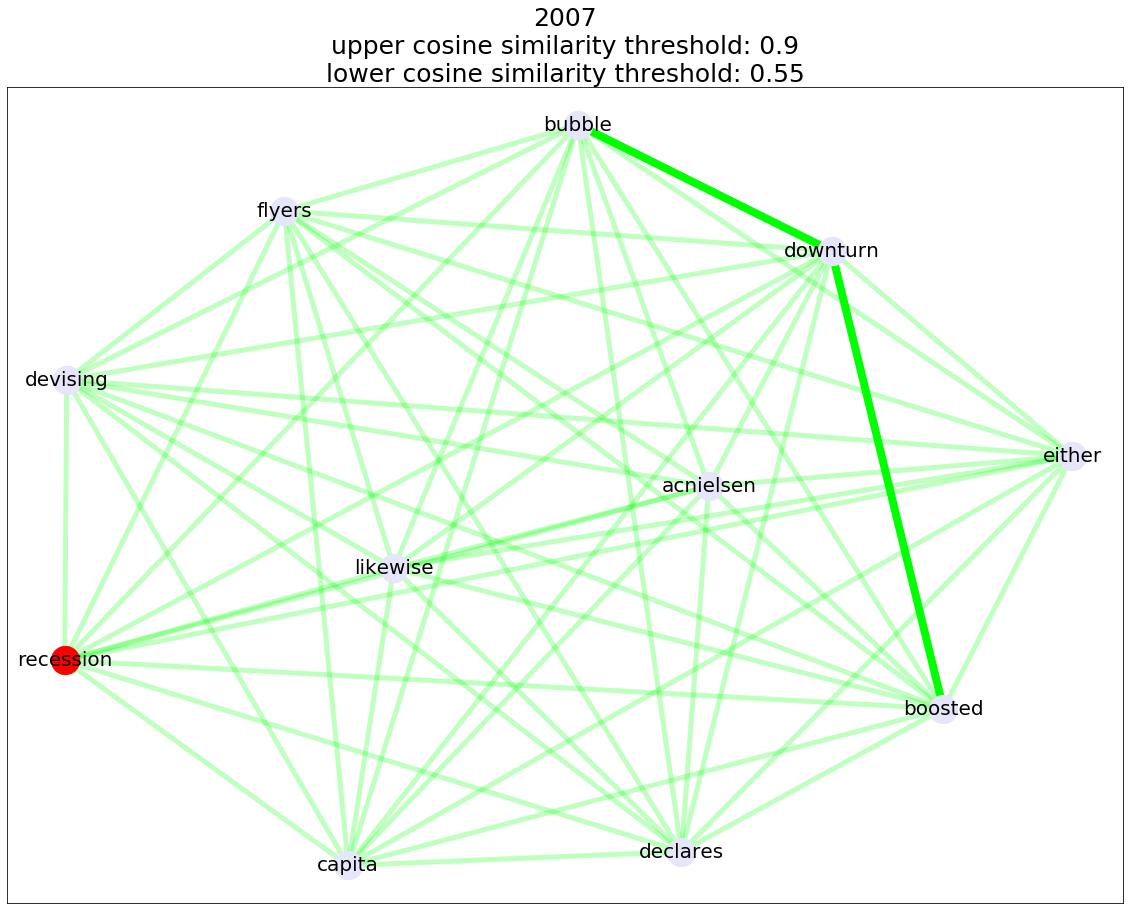

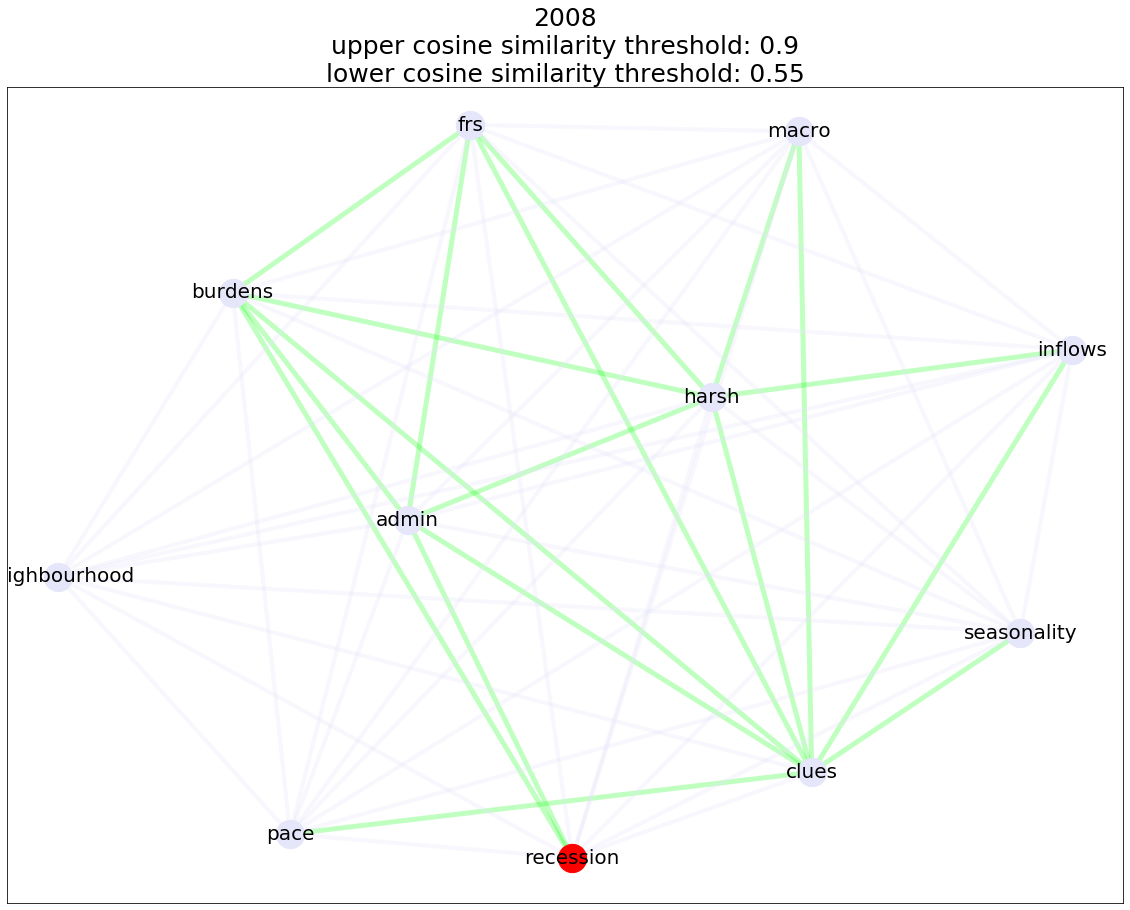

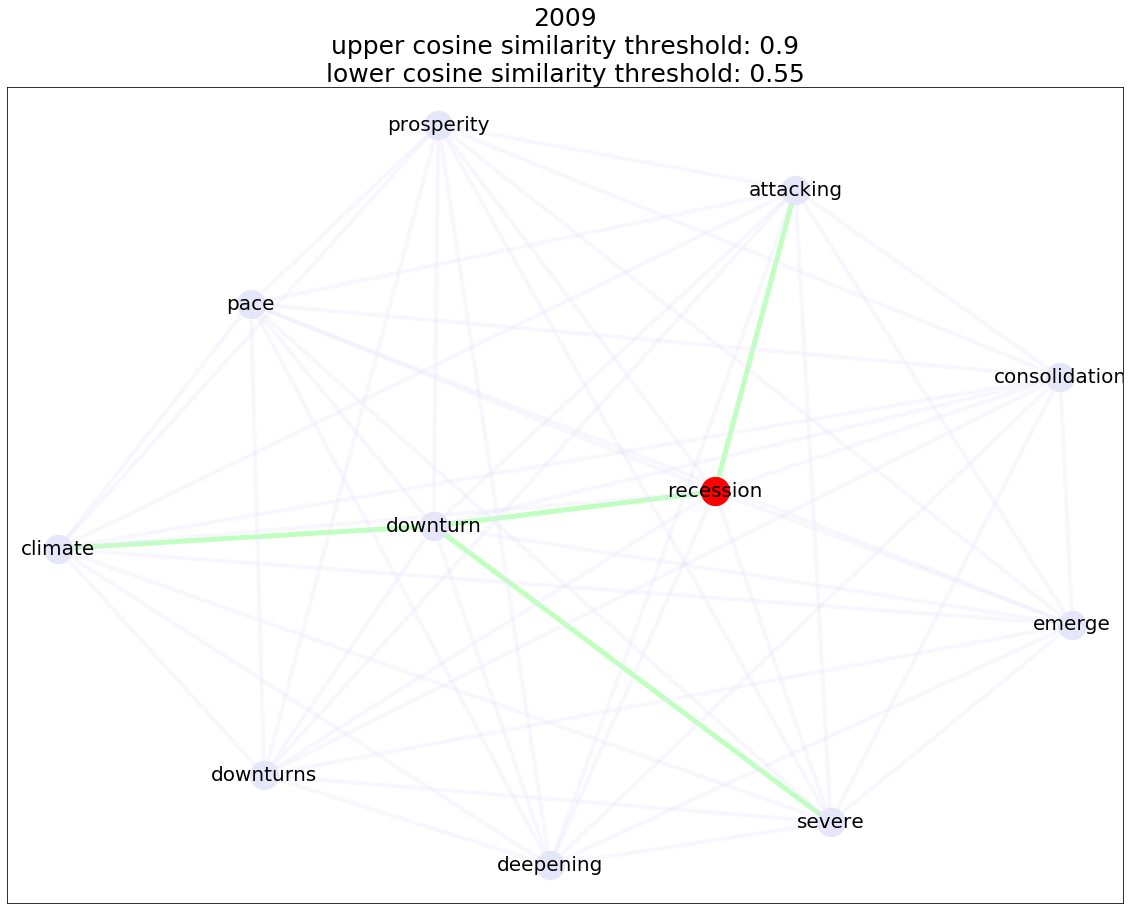

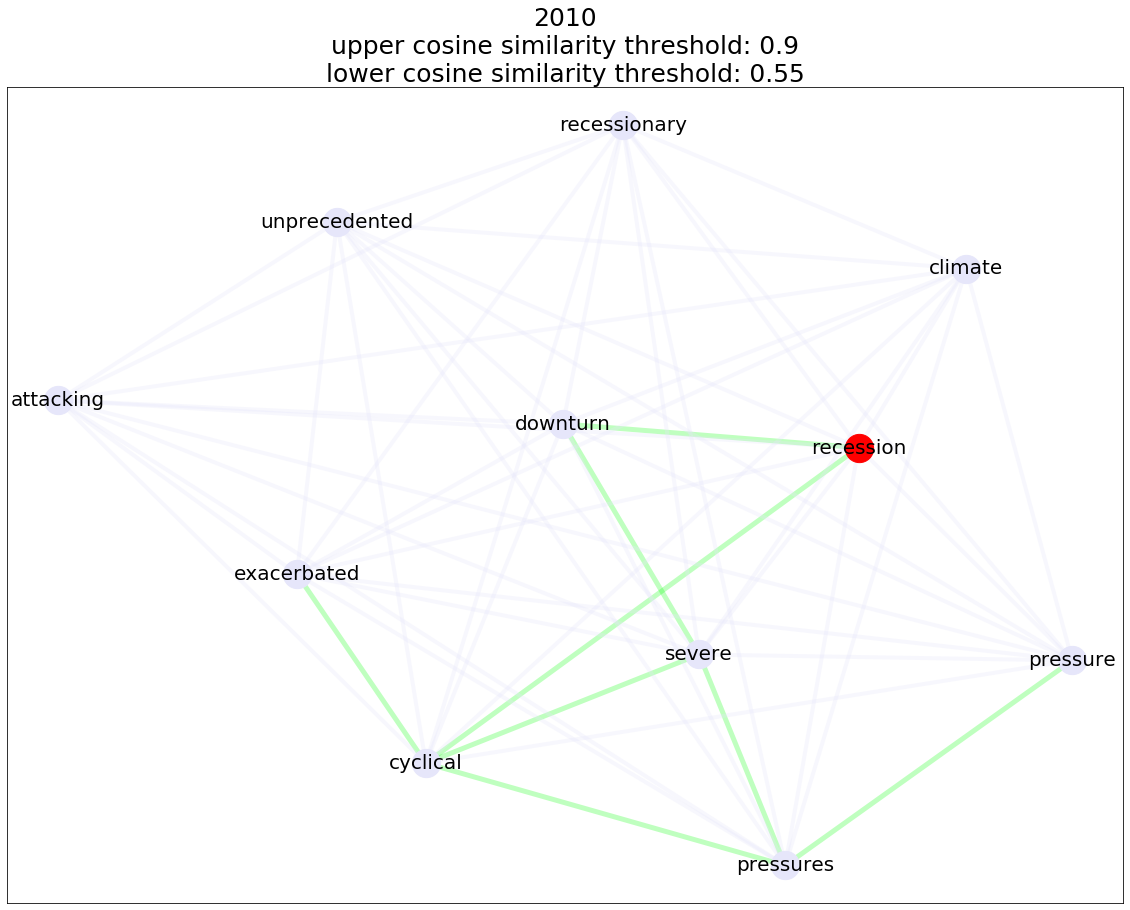

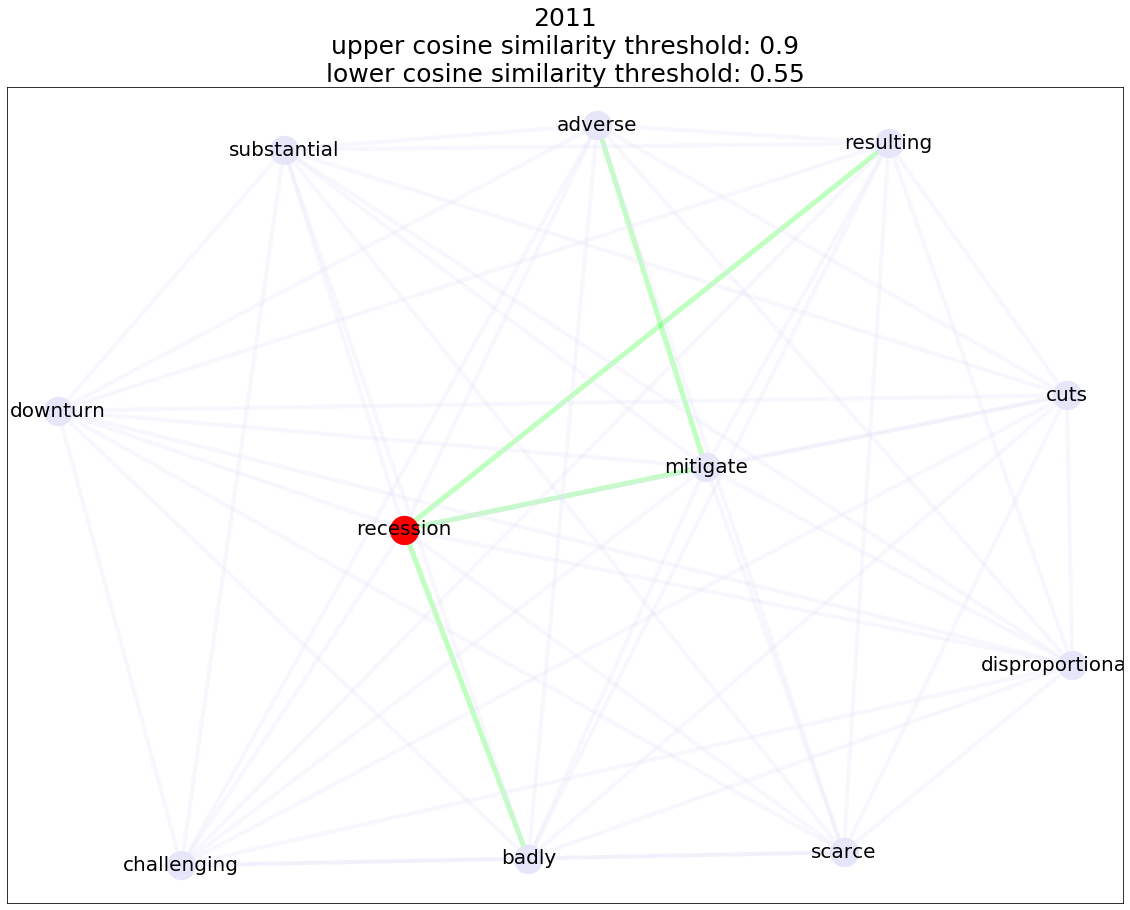

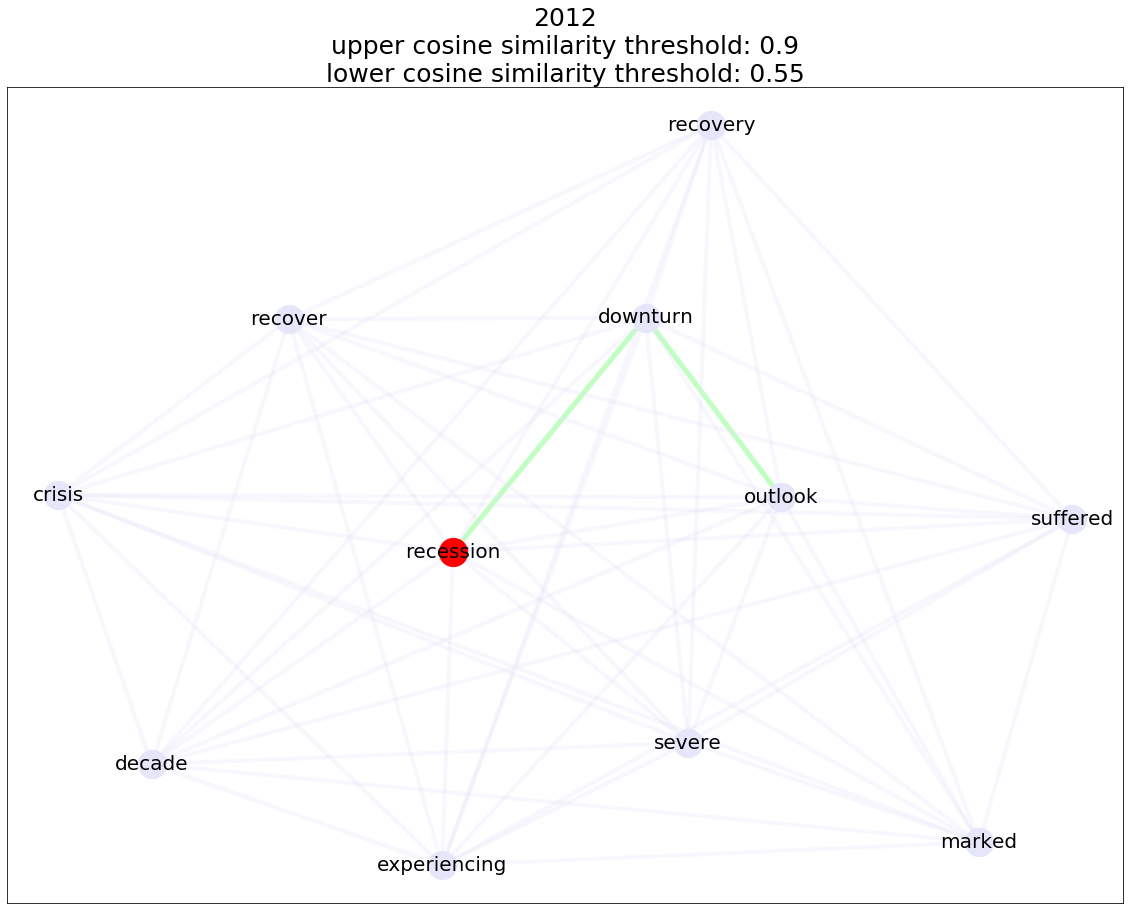

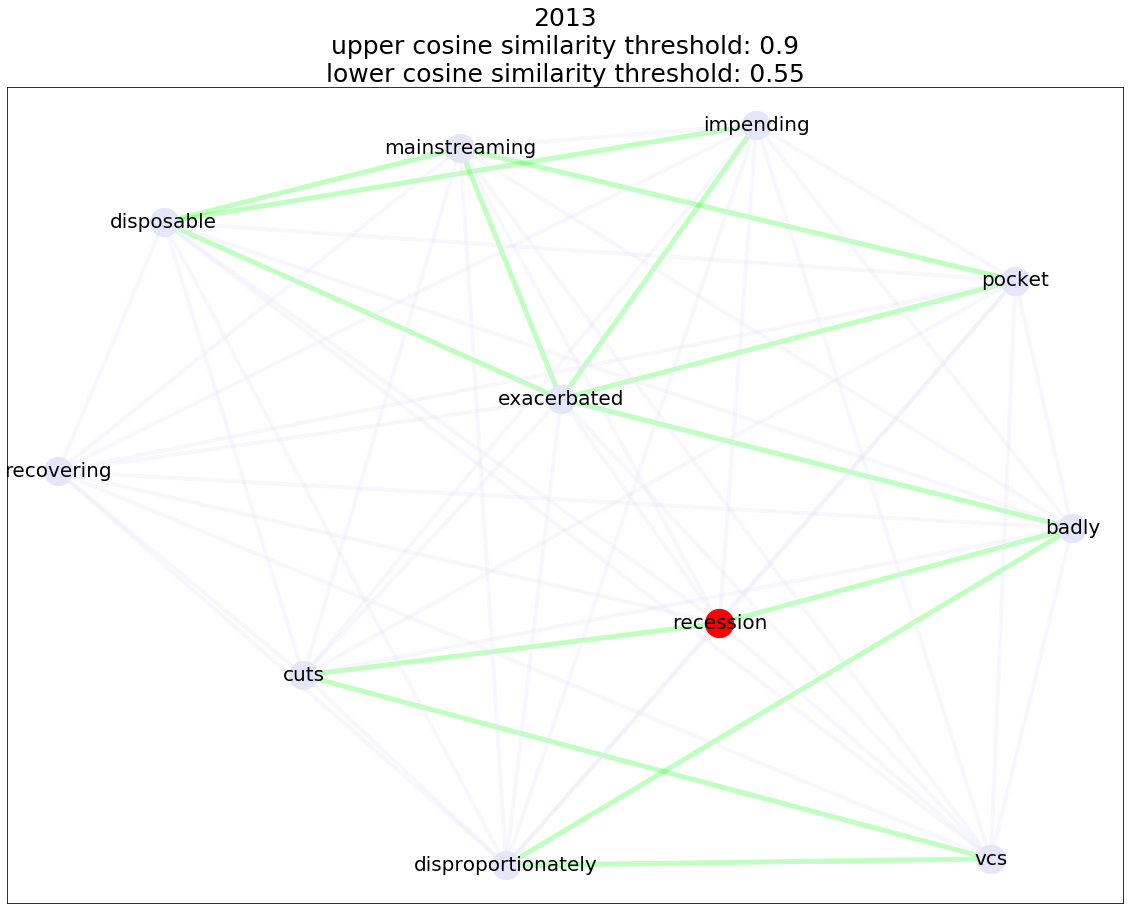

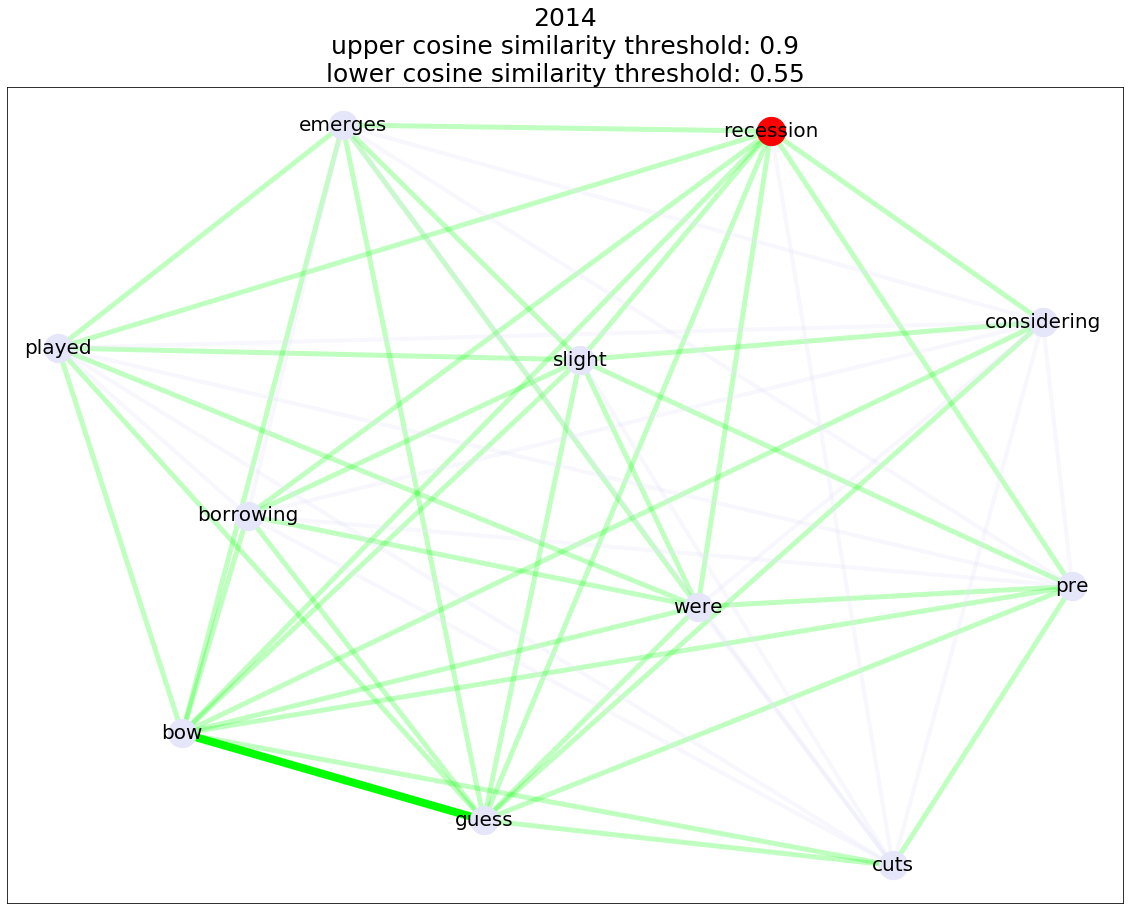

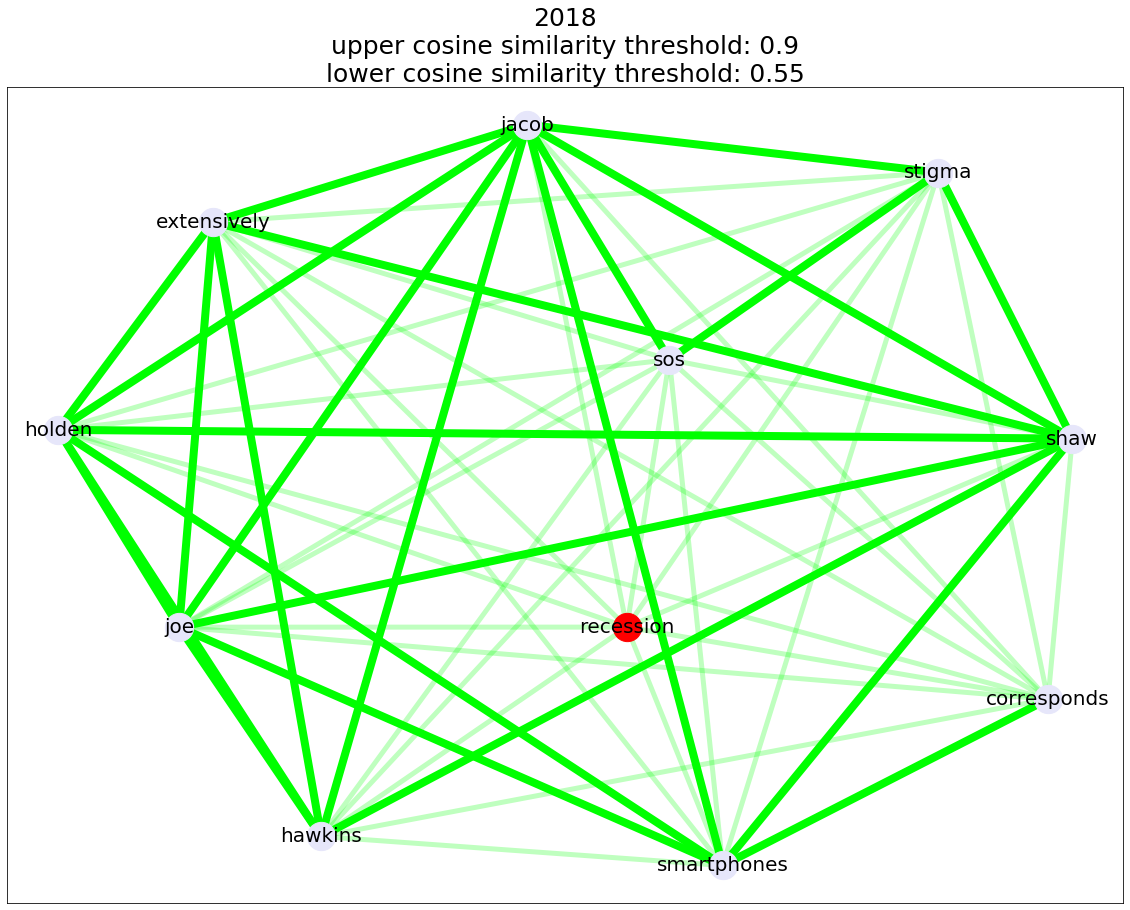

In [14]:
path = '/home/ayan-yue/Documents/projects/dynamic-word-embeddings/graphs/crisis-recession/'
graph('recession', 0.9, 0.55, path)